## FUNDAMENTALS OF DATA SCIENCE
##  CENSUS DATA PROJECT

# About the Project

Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having been conducted in 2021. The purpose of such a census is to compare different people across the nation and to provide the government with accurate statistics of the population to enable better planning, to develop policies, and to allocate certain funding.

This project will make use of mock data so we can make recommendations to the local governmenet on what to do with an unoccupied plot of land and what to invest in.

The mock census has been simulated using the Faker package in Python. It has been generated in a similar manner to (and designed to directly emulate the format of) the 1881 census of the UK wherein only a few questions were asked of the population. The fields recorded are as follows:
1. Street Number (this is set to 1 if it is a unique dwelling);
2. Street Name;
3. First Name of occupant;
4. Surname of occupant;
5. Age of occupant;
6. Relationship to the Head of the household (anyone aged over 18 can be a “Head” – they
are simply the person who had the responsibility to fill in the census details);
7. Marital status (one of: Single, Married, Divorced, Widowed, or “N/A” in the case of
minors);
8. Gender (one of: Male, Female; note that other responses were not implemented in 1881);
9. Occupation (this field was implemented in a modern style, rather than typical 1881
occupations);
10. Infirmity (we have implemented a limited set of infirmities following the style of 1881);
11. Religion (we have implemented a set of real-world religions).

# Objectives of the Project

(a) What should be built on an unoccupied plot of land that the local government wishes to develop? 
1. High-density housing? 
2. Low-density housing?
3. Train station?
4. Religious building?
5. Emergency medical building?
6. Something else?

(b) Which one of the following options should be invested in?
1. Employment and training?
2. Old age care?
3. Increase spending for schooling?
4. General infrastructure?

# Exploratory Data Analysis (EDA)
## We will read in our mock Census data and perform exploratory data analysis and some data cleaning

In [ ]:
# importing necessary library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [3]:
# Reading in the census data into pandas data frame
census_data = pd.read_csv("T1_A24census8.csv")

In [4]:
# Viewing the data frame
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Thomas Roads,Marilyn,Davies,44,Head,Married,Female,Unemployed,NaN,Christian
1,1,Thomas Roads,Mohammed,Davies-Tomlinson,45,Husband,Married,Male,Counselling psychologist,NaN,No Religion
2,1,Thomas Roads,Anna,Davies-Tomlinson,16,Daughter,NaN,Female,Student,NaN,Christian
3,1,Thomas Roads,Caroline,Davies-Tomlinson,13,Daughter,NaN,Female,Student,NaN,Christian
4,1,Thomas Roads,Denis,Davies-Tomlinson,11,Son,NaN,Male,Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7900,1,Parker Abbey,Sophie,Powell,54,Head,Single,Female,"Engineer, drilling",NaN,Christian
7901,1,Parker Abbey,Ashley,Bailey,55,Partner,Single,Male,Event organiser,NaN,Christian
7902,1,Parker Abbey,Diane,Powell,15,Daughter,NaN,Female,Student,NaN,No Religion
7903,1,Parker Abbey,Hayley,Powell,11,Daughter,NaN,Female,Student,NaN,No Religion


### Exploring our data

In [5]:
# Basic Analysis of the Dataset
def analyze_data(data):
    # General Overview
    print("Dataset Overview:\n")
    print(data.info())

    # Summary Statistics
    print("\nSummary Statistics:\n")
    print(data.describe(include='all'))

    # Check for Missing Values
    print("\nMissing Values:\n")
    print(data.isnull().sum())

    # Unique Values in Categorical Columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        print(f"\nUnique values in {column}:\n")
        print(data[column].value_counts())

# Calling the analysis function before data cleaning
analyze_data(census_data)

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7905 non-null   int64 
 1   Street                         7905 non-null   object
 2   First Name                     7905 non-null   object
 3   Surname                        7897 non-null   object
 4   Age                            7905 non-null   int64 
 5   Relationship to Head of House  7358 non-null   object
 6   Marital Status                 6100 non-null   object
 7   Gender                         7905 non-null   object
 8   Occupation                     7905 non-null   object
 9   Infirmity                      104 non-null    object
 10  Religion                       6930 non-null   object
dtypes: int64(2), object(9)
memory usage: 679.5+ KB
None

Summary Statistics:

        House Number        

In [6]:

# Checking the percentage of missing records
missing_percentage = census_data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].map("{:.2f}%".format)
print(missing_percentage)


Surname                           0.10%
Relationship to Head of House     6.92%
Marital Status                   22.83%
Infirmity                        98.68%
Religion                         12.33%
dtype: object


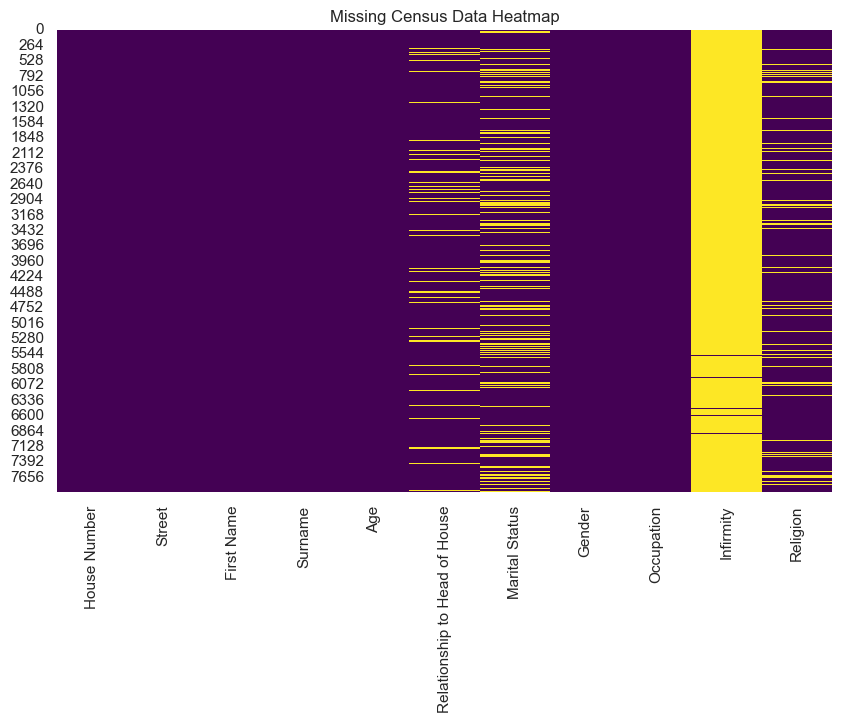

In [7]:
# Visualizing missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(census_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Census Data Heatmap")
plt.show()

#### Insight on Missing Data

1. Infirmity and Religion columns show a significant amount of missing data, with many rows in yellow (indicating missing values). This suggests that these columns have considerable gaps that need to be addressed, either through imputation or removal, depending on the dataset's requirements.
2. Surname, Age, and Relationship to Head of House also have some missing data, but they are less severe compared to the columns mentioned above.
3. Occupation also has noticeable missing data, though not as much as Infirmity and Religion.

In [8]:
#Checking for duplicate value in the data set
census_data.duplicated().sum() 

0

In [9]:
 # checking the statistical summary of our data
census_data.describe(include='all')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,7905.000000,7905,7905,7897,7905.000000,7358,6100,7905,7905,104,6930
unique,NaN,134,364,624,NaN,20,4,2,1079,8,8
top,NaN,Smith Harbors,Alice,Smith,NaN,Head,Single,Female,Student,Physical Disability,Christian
freq,NaN,724,38,206,NaN,2944,2780,4201,1505,21,3572
mean,43.736875,NaN,NaN,NaN,36.506894,NaN,NaN,NaN,NaN,NaN,NaN
std,47.990972,NaN,NaN,NaN,21.722282,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.000000,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,22.000000,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,66.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

# SURNAME CHECK AND FIX

### We will look at the Surname Column and find ways to fill in the missing Surnames

In [10]:
# Getting rows with empty value in Surname Column
census_data[census_data['Surname'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
841,113,Green Road,Ricky,NaN,37,Husband,Married,Male,Building services engineer,NaN,No Religion
3502,3,Kestrel Path,Glen,NaN,69,Husband,Married,Male,"Retired Engineer, electrical",NaN,Christian
4457,145,Belle Street,Samuel,NaN,48,Husband,Married,Male,"Physicist, medical",NaN,Christian
4580,17,Statue Centers,Vincent,NaN,61,Husband,Married,Male,Computer games developer,NaN,Christian
6374,12,Elliott Square,Josephine,NaN,62,Wife,Married,Female,Arboriculturist,NaN,No Religion
6902,3,Clark Crescent,Alan,NaN,58,Husband,Married,Male,Product manager,NaN,Christian
7561,9,Snapdragon Road,Martin,NaN,45,Husband,Married,Male,Airline pilot,NaN,No Religion
7684,15,Newton Lock,Brett,NaN,60,Husband,Married,Male,Clothing/textile technologist,NaN,No Religion


### Outcome of Check

 1. There are some missing Surnames that needs to be filled by taking samples of the households

### Cleaning the Missing Surnames by Infering from the Same Household

In [11]:
# Identifing rows where the surname is missing (NaN or null)
missing_surnames = census_data['Surname'].isnull()

# Filtering the data to find family members (Husband, Daughter, Son, Head, Wife) with missing surnames
family_data = census_data.loc[
    missing_surnames &  # Ensure the surname is missing
    census_data['Relationship to Head of House'].isin(['Husband', 'Daughter', 'Son', 'Head', 'Wife'])  # Filter by family relationship
]

# Iterating over each row in the filtered family data
for index, row in family_data.iterrows():
    # Find the surname of the "Head of House" in the same household
    head_surname = census_data.loc[
        (census_data['House Number'] == row['House Number']) &  # Same household (same House Number)
        (census_data['Street'] == row['Street']) &  # Same Street
        (census_data['Relationship to Head of House'] == 'Head'),  # Relationship is 'Head'
        'Surname'  # We want the 'Surname' column
    ]
    
    # If a surname is found for the Head of House (i.e., head_surname is not empty)
    if not head_surname.empty:
        # Assign the Head's surname to the current row with the missing surname
        census_data.at[index, 'Surname'] = head_surname.values[0]

# Check if any surnames are still missing
missing_surnames_after = census_data['Surname'].isnull().sum()
print(f"Number of missing surnames after update: {missing_surnames_after}")


Number of missing surnames after update: 0


In [12]:
# Rechecking empty value in Surname Column
census_data[census_data['Surname'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## AGE CHECK AND FIX

In [13]:
# Checking the unique values in the age column to detect outliers
census_data['Age'].unique()

array([ 44,  45,  16,  13,  11,  39,  15,   8,   6,  50,  53,  25,  22,
        17,  43,  47,  10,  80, 101, 105,  21,  31,  52,  60,  30,  51,
        49,  33,  41,  36,  37,  66,  81,  78,  56,  27,   0,  19,  55,
        69,  72,  84,  85,  65,  34,  48,   9,  26,  23,  67,  62,  76,
        58,  54,  35,  28,  61,  89,   1,  24,  20,  79,   5,   7,  73,
        68,  86,   2,  14,  18,  29,  59,   4,  32,  40,  87,  63,  38,
        71,  75,  12,  77,   3,  46,  64,  83,  70,  57,  42,  96,  94,
        93,  82,  74,  97,  88,  98,  95,  90, 100,  99, 103, 104, 102,
        91], dtype=int64)

In [14]:
# Getting rows with empty value in Age Column
census_data[census_data['Age'] == " " ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Outcome of Check

 1. There are no null or empty values in the Age column.
 2. The data type is consistent.
 3. There may however be people who are lying about their ages as is tpyical of most population census

### Checking and cleaning respondents with Ages below 18 showing as married

In [15]:
# Check for individuals under 18 marked as "Married"
underage_married = census_data.loc[(census_data["Age"] < 18) & (census_data["Marital Status"] == "Married")]

# Print the rows that meet the condition
print("There are",len(underage_married), "underaged who responded as married")


# Update marital status to "Single" for individuals under 18 who are marked as "Married"
census_data.loc[(census_data["Age"] < 18) & (census_data["Marital Status"] == "Married"), "Marital Status"] = "Single"
print("Their Status has been updated to Single")
  

There are 27 underaged who responded as married
Their Status has been updated to Single


In [16]:
census_data['Age'].describe()

count    7905.000000
mean       36.506894
std        21.722282
min         0.000000
25%        19.000000
50%        36.000000
75%        52.000000
max       105.000000
Name: Age, dtype: float64

#### Statistical Summary of the Age:

 1. The **minimum age is 0** and **maximum is 105**
 2. The **mean is 36.50**
 3. The **25th percentile** indicates that 25% of the population are less than or equal to 19.
 4. The **50th percentile** indicates that 50% of the population are less than or equal to 36.
 5. The **75th percentile** indicates that 75% of the population are less than or equal to 52.
##### This indicates that the population consist of mostly working class people.


## Plotting the Age Pyramid to Extract Insights

C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\1148423672.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = census_data.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)


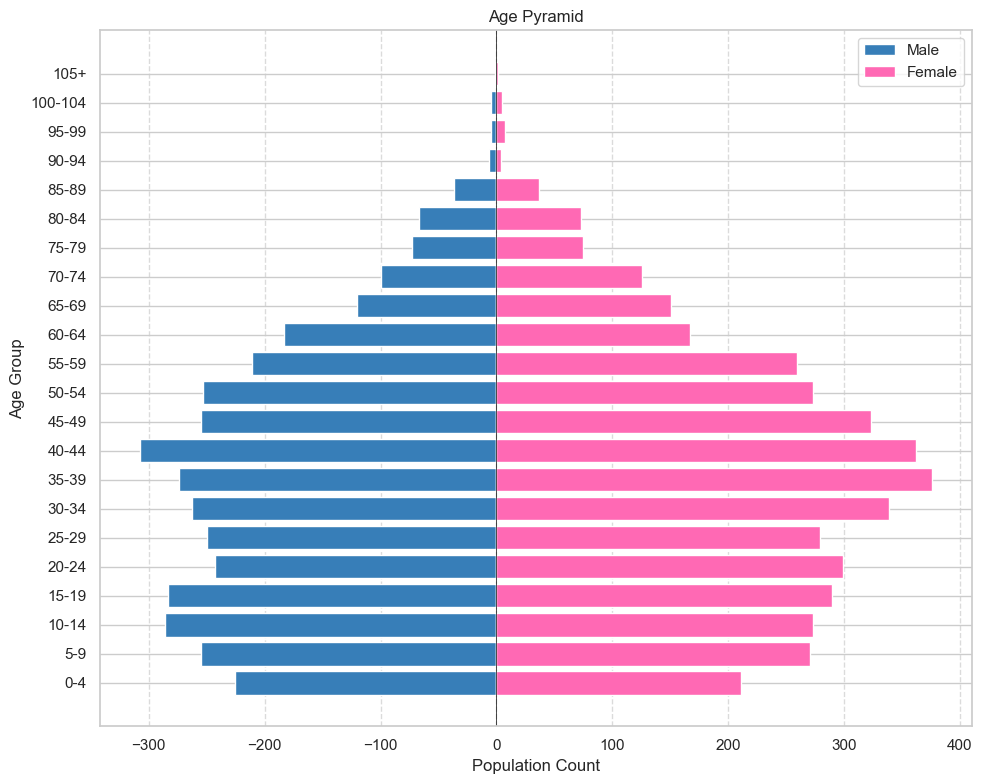

In [17]:
# Defining age bins and labels for the pyramid

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104','105+']
# Bin the ages
census_data['Age Group'] = pd.cut(census_data['Age'], bins=bins, labels=labels, right=False)
 
# Group by gender and age group to get counts
age_gender_counts = census_data.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)
 
# Separate counts for males and females
male_counts = -age_gender_counts.get('Male', 0)  # Negative for left side of pyramid
female_counts = age_gender_counts.get('Female', 0)
 
# Plotting the age pyramid
plt.figure(figsize=(10, 8))
plt.barh(age_gender_counts.index, male_counts, color='#377EB8', label='Male')
plt.barh(age_gender_counts.index, female_counts, color='#FF69B4', label='Female')
 
# Add labels and formatting
plt.xlabel('Population Count')
plt.ylabel('Age Group')
plt.title('Age Pyramid')
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
 
# Show the plot
plt.show()

# Key Insights from the Age Pyramid

## 1. Youth Bulge
The pyramid has a wide base, indicating a relatively large young population. For example, the 0-4 and 5-9 age groups each account for over 200 people. This "youth bulge" suggests the population skews toward the younger end of the spectrum.

## 2. Aging Population
In contrast, the older age groups get progressively smaller. The 100-104 and 105+ categories have fewer than 50 people total. This tapering at the top indicates an aging population with fewer individuals reaching advanced ages.

## 3. Gender Balance
Looking at the gender split, we see a fairly balanced distribution between males and females across most age groups. The male and female bars are close in size, with only slight imbalances in a few brackets.

## 4. Dependency Ratio
To quantify the dependency ratio, we can look at the proportion of the population under 15 and over 65. The under-15 group makes up over 30% of the total, while the over-65s account for around 10%. This means the dependency ratio - the number of dependents per 100 working-age adults - is likely high, potentially posing challenges for the working population to support the young and elderly.

## 5. Population in Transition
Overall, this age pyramid points to a population in transition, with a large youth segment but also signs of increasing longevity and an aging demographic. Managing the needs of both the young and old will be an important consideration going forward.

In [18]:
# Checking for empty rows or Null values
census_data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     547
Marital Status                   1805
Gender                              0
Occupation                          0
Infirmity                        7801
Religion                          975
Age Group                           0
dtype: int64

## INFIRMITY CHECK AND FIX

In [19]:
census_data['Infirmity'].unique()

array([nan, 'Blind', 'Unhealthy', 'Mental Disability',
       'Unknown Infection', 'Physical Disability', ' ', 'Disabled',
       'Deaf'], dtype=object)

### Outcome of Check

 1. There are 7801 nan values in the Infirmity column and empty strings that needs to be filled
 2. The are also some sickenesses that are not INfirmities as they do not represent any form of permanent disability.

### Cleaning the Infirmity Column by Infering no Infirmity for nan and empty Strings and Updating minor sicknesses

In [20]:
# Replacing null values in the 'Infirmity' column with 'No Infirmity'
census_data['Infirmity'] = census_data['Infirmity'].fillna('No Infirmity')

#Filling missing values with None
census_data['Infirmity'] = census_data['Infirmity'].replace(' ', 'No Infirmity')

# Updating unhealthy and unknown infection values in the 'Infirmity' column to 'No Infirmity'
census_data['Infirmity'] = census_data['Infirmity'].replace(['Unhealthy', 'Unknown Infection'], 'No Infirmity')

# Display the unique values to verify the changes
print(census_data['Infirmity'].unique())

['No Infirmity' 'Blind' 'Mental Disability' 'Physical Disability'
 'Disabled' 'Deaf']


In [21]:
census_data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     547
Marital Status                   1805
Gender                              0
Occupation                          0
Infirmity                           0
Religion                          975
Age Group                           0
dtype: int64

## RELATIONSHIP TO HEAD OF HOUSE CHECK AND FIX

In [22]:
census_data[census_data['Relationship to Head of House'].isna()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
27,1,Iron Avenue,Debra,Gill,31,NaN,Divorced,Female,Unemployed,No Infirmity,No Religion,30-34
28,1,Iron Avenue,John,Akhtar,52,NaN,Single,Male,Astronomer,No Infirmity,No Religion,50-54
132,6,Hunter Squares,Allan,Chapman,22,NaN,Single,Male,University Student,No Infirmity,No Religion,20-24
133,6,Hunter Squares,Linda,Mills,19,NaN,Single,Female,University Student,No Infirmity,Christian,15-19
134,6,Hunter Squares,Albert,Taylor,21,NaN,Single,Male,University Student,No Infirmity,Christian,20-24
...,...,...,...,...,...,...,...,...,...,...,...,...
7878,1,Virgo Villa,Linda,Hill,18,NaN,Single,Female,Student,No Infirmity,NaN,15-19
7887,1,Castor Fort,Lucy,Hughes,63,NaN,Single,Female,"Librarian, public",No Infirmity,Christian,60-64
7888,1,Castor Fort,Terry,Hope,30,NaN,Divorced,Male,Unemployed,No Infirmity,Christian,30-34
7889,1,Castor Fort,Declan,Parsons,53,NaN,Single,Male,Training and development officer,No Infirmity,Christian,50-54


In [23]:
census_data['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', nan, 'Partner', 'Wife',
       'Cousin', 'Granddaughter', 'Adopted Daughter', 'Lodger', 'Sibling',
       'Grandson', 'Step-Son', 'Step-Daughter', 'Visitor', 'Adopted Son',
       'Nephew', 'Niece', 'Daughter-in-law', 'Adopted Grandson'],
      dtype=object)

### Outcome of Check
 1. There are 547 nan values in the Relationship to Head of House Column that needs to be fixed.


### Cleaning Relationship to Head of House Using Ages and Weighted Random Sampling

In [24]:

# Update the 'Relationship to Head of House' column for individuals less than 18 and gender is male to Son
census_data.loc[(census_data['Age'] <= 18) & (census_data['Gender'] == 'Male') & (census_data['Relationship to Head of House'].isna()), 
'Relationship to Head of House'] = 'Son'

# Update the 'Relationship to Head of House' column for individuals less than 18 and gender is female to Daughter
census_data.loc[(census_data['Age'] <= 18) & (census_data['Gender'] == 'Female') & (census_data['Relationship to Head of House'].isna()), 
'Relationship to Head of House'] = 'Daughter'

# Calculate the number of remaining missing values in the 'Relationship to Head of House' column
missing_relationships = census_data['Relationship to Head of House'].isna().sum()


# Use weighted random sampling to fill the remaining NaN values
relationship_freqs = census_data['Relationship to Head of House'].value_counts(normalize=True)
census_data.loc[census_data['Relationship to Head of House'].isna(), 'Relationship to Head of House'] = np.random.choice(relationship_freqs.index, size=missing_relationships, p=relationship_freqs.values)

## MARITAL STATUS CHECK

In [25]:
census_data['Marital Status'].unique()

array(['Married', nan, 'Single', 'Divorced', 'Widowed'], dtype=object)

In [26]:
census_data[census_data['Marital Status'].isna()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
2,1,Thomas Roads,Anna,Davies-Tomlinson,16,Daughter,NaN,Female,Student,No Infirmity,Christian,15-19
3,1,Thomas Roads,Caroline,Davies-Tomlinson,13,Daughter,NaN,Female,Student,No Infirmity,Christian,10-14
4,1,Thomas Roads,Denis,Davies-Tomlinson,11,Son,NaN,Male,Student,No Infirmity,Christian,10-14
6,2,Thomas Roads,Timothy,Rowe,15,Son,NaN,Male,Student,No Infirmity,NaN,15-19
7,2,Thomas Roads,Andrea,Rowe,11,Daughter,NaN,Female,Student,No Infirmity,NaN,10-14
...,...,...,...,...,...,...,...,...,...,...,...,...
7896,1,Trawler Castle,Dale,Gill,7,Son,NaN,Male,Student,No Infirmity,No Religion,5-9
7897,1,Trawler Castle,Josephine,Gill,3,Daughter,NaN,Female,Child,Disabled,No Religion,0-4
7902,1,Parker Abbey,Diane,Powell,15,Daughter,NaN,Female,Student,No Infirmity,No Religion,15-19
7903,1,Parker Abbey,Hayley,Powell,11,Daughter,NaN,Female,Student,No Infirmity,No Religion,10-14


In [27]:
# Get the rows with missing Marital Status
missing_marital_status = census_data[census_data['Marital Status'].isna()]

# Check if all the ages in the missing rows are less than 18
if all(missing_marital_status['Age'] < 18):
    print("All ages in the missing Marital Status rows are less than 18.")
else:
    print("Not all ages in the missing Marital Status rows are less than 18.")

All ages in the missing Marital Status rows are less than 18.


### Outcome of Check

 1. There are 1805 nan values in the marital status column.
 2. All nan values are people who are less than 18years of age

### Cleaning Marital Status Updating all to Single

#### https://www.gov.uk/government/news/legal-age-of-marriage-in-england-and-wales-rises-to-18

In [28]:

#Fill missing values based on the UK government rule.
census_data.loc[census_data['Marital Status'].isnull() & (census_data['Age'] < 18), 'Marital Status'] = 'Single'


### Ploting Marital Status Distribution

C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\2887715835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  marital_status_plt = sns.countplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\2887715835.py:4: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  marital_status_plt = sns.countplot(


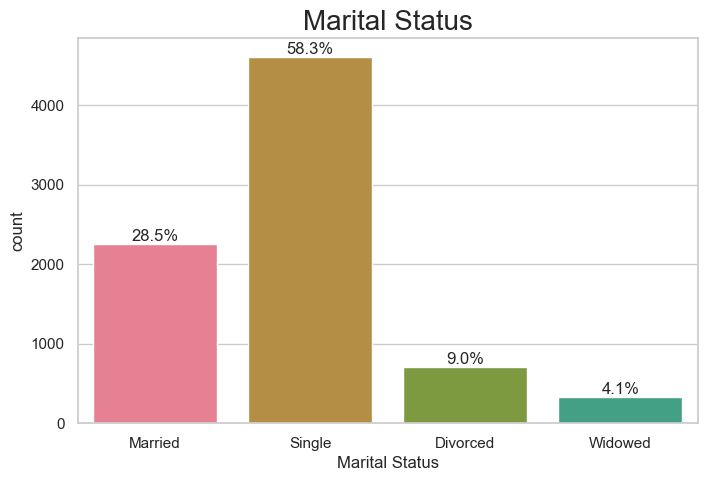

In [29]:
plt.figure(figsize=(8, 5))

# Plot marital status counts
marital_status_plt = sns.countplot(
    x="Marital Status", 
    data=census_data, 
    palette=sns.color_palette("husl", 7)
)
plt.title('Marital Status', fontsize=20)

# Annotate bars with percentages
total = len(census_data)
for bar in marital_status_plt.patches:
    percentage = f'{100 * bar.get_height() / total:.1f}%'
    marital_status_plt.annotate(
        percentage, 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom'
    )

# Save and show the plot
plt.savefig('marital_status.png')
plt.show()


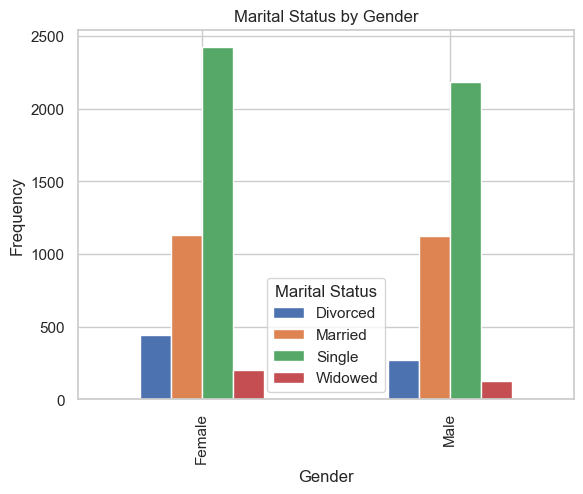

In [30]:
# Clustered bar chart of Gender and Marital Status

census_data.groupby(['Gender', 'Marital Status']).size().unstack().plot(kind = 'bar')

plt.xlabel('Gender')

plt.ylabel('Frequency')

plt.title('Marital Status by Gender')

plt.savefig('Marital_status_by_gender.png')

plt.show()

### Insights on Marital Status Distribution

#### Single Individuals (58.3%):
The majority of individuals in the dataset are single, accounting for more than half (58.3%) of the population. This could suggest that a large proportion of the population is either never married or currently not in a relationship. This trend might be typical in younger populations or in populations with a high number of unmarried individuals.

#### Married Individuals (28.5%):
A significant portion of the population (28.5%) is married, indicating that marriage is a common status in this dataset. This could reflect societal norms or cultural trends in the population under study.

#### Divorced Individuals (9%):
A smaller but notable proportion (9%) of individuals are divorced. This shows a fair percentage of the population has experienced marital separation.

#### Widowed Individuals (4.1%):
The smallest group (4.1%) are widowed. This could indicate a relatively older population or could reflect a lower incidence of widowhood in this dataset compared to other groups.

### Insights:
- The large percentage of singles (58.3%) stands out and may point to a younger demographic or a preference for remaining unmarried in the population.
- The lower percentages of divorced and widowed individuals suggest that while divorce is present, it is not as prevalent, and widowhood is relatively rare in the sample.

---

### Marital Status by Gender

The visualizations above shows how marital status varies between genders. It provides insights into the gender distribution across different marital statuses, revealing key patterns:

- **Single:** Both males and females show a significantly high number of individuals who are single. However, the frequency of single individuals is larger among females.
- **Married:** There is a large proportion of married individuals, especially among females. This reflects a cultural trend where marriage is common, but the gender difference indicates possible societal differences in marriage patterns.
- **Divorced:** The number of divorced females is higher compared to males, indicating that women in this dataset may experience higher rates of divorce.
- **Widowed:** The number of widowed individuals is low overall, with a slightly higher number of widowed females.




## RELIGION CHECK

In [31]:
census_data['Religion'].unique()

array(['Christian', 'No Religion', nan, 'Hindu', 'Muslim', 'Sikh',
       'Venatori', 'Mormon', 'The Order of the Pheonix'], dtype=object)

### Outcome of Check

 1. There are 975 nan or empty values in the Religion column.
 2. Some people are lying about their religion that needs to be fixed
 3. Some religion needs to be re-classified

### Cleaning and fixing Religion Column

In [ ]:
# Replace 'Venatori' and The Order of the Pheonix with 'No Religion' in the Religion column
census_data['Religion'] = census_data['Religion'].replace(['Venatori', 'The Order of the Pheonix'], 'No Religion')

# Updating Mormon religion to Christianity
# Office for National Statistics (ONS), 2023. Religion, England and Wales: Census 2021. [online] Available at: https://www.ons.gov.uk [Accessed 10 December 2024].
# The Church of Jesus Christ of Latter-day Saints, 2021. Mormonism 101: FAQ. [online] Available at: https://news-gu.churchofjesuschrist.org/article/mormonism-101#:~:text=Mormonism%20is%20a%20term%20defining,through%20the%20Prophet%20Joseph%20Smith [Accessed 10 December 2024]
census_data['Religion'] = census_data['Religion'].replace(['Mormon'], 'Christian')



### Fixing Nan Religion with Probabilistic Imputation

In [33]:
# Fixing Nan Religion

# Function to sample based on the frequency distribution within a group
def probabilistic_imputation(group, overall_mode):
    """Impute missing values in a group using a probabilistic approach."""
    # Get the value counts (frequencies) of non-missing values
    value_counts = group["Religion"].value_counts(normalize=True)
    
    # If value_counts is empty, fallback to overall mode
    if value_counts.empty:
        group["Religion"] = group["Religion"].fillna(overall_mode)
    else:
        # Replace missing values with a random sample based on the frequency distribution
        group["Religion"] = group["Religion"].apply(
            lambda x: np.random.choice(value_counts.index, p=value_counts.values) if pd.isna(x) else x
        )
    return group

# Calculate the overall mode for fallback
overall_mode_religion = census_data["Religion"].mode()[0]

# Group the data by both "House Number" and "Street" and apply the probabilistic imputation function
census_data = census_data.groupby(["House Number", "Street"], group_keys=False).apply(probabilistic_imputation, overall_mode_religion)

# Reset the index to avoid keeping the group columns as part of the DataFrame
census_data = census_data.reset_index(drop=True)

# Check the result
missing_values = census_data["Religion"].isna().sum()
print(f"Number of missing Religion values: {missing_values}")



Number of missing Religion values: 0


C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\639132267.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  census_data = census_data.groupby(["House Number", "Street"], group_keys=False).apply(probabilistic_imputation, overall_mode_religion)


C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\955470482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  religion_plt = sns.countplot(x="Religion", data=census_data, palette=sns.color_palette("husl", 7))
C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\955470482.py:8: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  religion_plt = sns.countplot(x="Religion", data=census_data, palette=sns.color_palette("husl", 7))
C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\955470482.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  religion_plt.set_xticklabels(religion_plt.get_xticklabels(), fontsize=8)


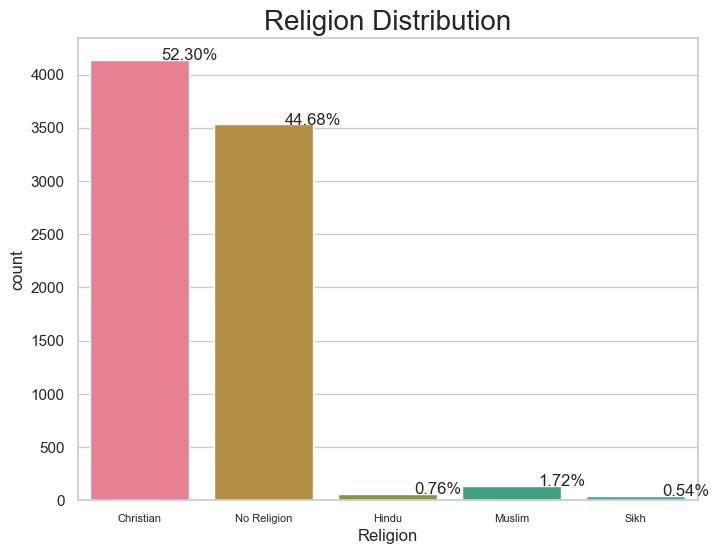

In [34]:

# Create the figure for the plot
plt.figure(figsize=(8, 6))

# Calculate the total number of entries in the dataset
total = float(len(census_data))

# Create a bar plot for Religion data
religion_plt = sns.countplot(x="Religion", data=census_data, palette=sns.color_palette("husl", 7))

# Add a title to the plot
plt.title('Religion Distribution', fontsize=20)

# Loop through each bar in the plot to calculate and add the percentage on top
for plot_att in religion_plt.patches:
    percentage = '{:.2f}%'.format(100 * plot_att.get_height() / total)
    x = plot_att.get_x() + plot_att.get_width()  # Position for text
    y = plot_att.get_height()  # Height of the bar
    religion_plt.annotate(percentage, (x, y), ha='center')

# Adjust font size for the x-axis labels
religion_plt.set_xticklabels(religion_plt.get_xticklabels(), fontsize=8)

# Save the plot as a PNG image
plt.savefig('religion_plt.png')

# Show the plot
plt.show()


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

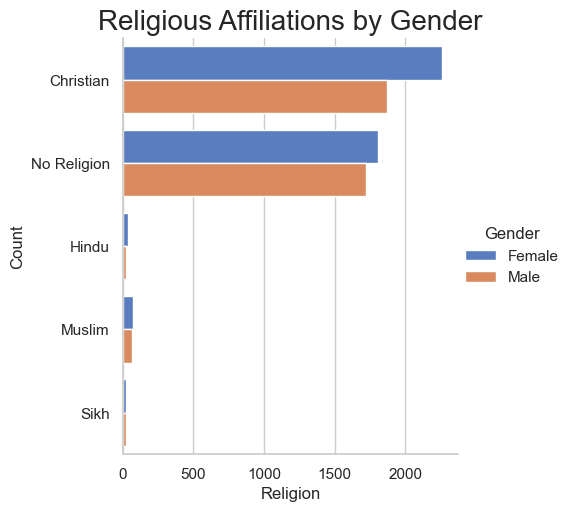

In [35]:
plt.figure(figsize=(10, 8))
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 8))
    sns.catplot(y='Religion', hue='Gender', data=census_data, kind='count', palette='muted')
    plt.title('Religious Affiliations by Gender', fontsize=20)
    plt.xlabel('Religion', fontsize=12)
    plt.ylabel('Count', fontsize=12)
plt.savefig('religious_gender_plt.png')
plt.show()

In [36]:
census_data.groupby('Religion')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Christian,4134.0,39.231737,22.236885,0.0,20.00,40.0,55.00,105.0
Hindu,60.0,32.316667,20.802128,1.0,22.00,30.0,36.75,96.0
Muslim,136.0,28.860294,18.512928,0.0,15.75,27.5,38.25,79.0
No Religion,3532.0,33.679219,20.769927,0.0,17.00,32.0,47.00,105.0
Sikh,43.0,36.837209,23.349243,0.0,17.00,32.0,55.00,88.0


# Insight from Religious Affiliations Analysis

## Insights from Image 1: Religious Affiliations by Gender

- **Gender Differences in Christianity**: The image shows that there are more female Christians than male Christians in the population.  
- **Gender Differences in No Religion**: Similarly, there are more females than males who have no religious affiliation.  
- **Gender Differences in Hinduism**: The image indicates that there are more Hindu females than Hindu males.  
- **Gender Differences in Islam**: The graph suggests that there are more Muslim males than Muslim females.  
- **Gender Differences in Sikhism**: The data shows that the Sikh population is predominantly male.  

## Insights from Image 2: Religion Distribution

- **Dominance of Christianity**: The image reveals that Christianity is the most prevalent religion, accounting for over 52% of the population.  
- **Significant No Religion Population**: The second largest group is those with no religious affiliation, making up nearly 45% of the population.  
- **Smaller Minority Religions**: The remaining religious groups, including Hinduism, Islam, and Sikhism, have much smaller proportions, each representing less than 1% of the population.  
- **Numerical Representation**: While the gender breakdown in Image 1 provides some insights, Image 2 gives a clearer picture of the overall numerical representation of each religious group in the population.  
- **Potential Implications**: The religious distribution data can have implications for understanding the cultural, social, and demographic landscape of the community, as well as informing policy decisions and resource allocation.


In [37]:
census_data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age Group                        0
dtype: int64

In [38]:
# Writing the Cleaned DataFrame to a CSV file to keep a copy
census_data.to_csv("output_filename.csv", index=False)


## Data Cleaning Completed

# FURTHER ANALYSIS

# EXAMINING OCCUPATIONS

C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\1867447884.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age", y="Employment_Status", data=census_data, palette='Paired_r')


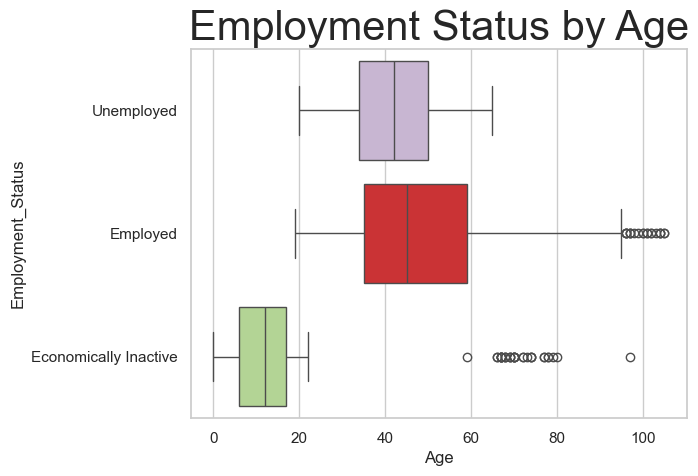

In [39]:
# Create a mapping dictionary for conditions and Employment Status
employment_status_conditions = {
    'Unemployed': lambda row: row['Occupation'] == 'Unemployed',
    'Retired': lambda row: row['Occupation'] == 'Unemployed' and row['Age'] > 65,
    'University Student': lambda row: 'University Student' in row['Occupation'],
    'Student': lambda row: row['Occupation'].startswith('Student'),
    'Child': lambda row: row['Occupation'] == 'Child',
}

# Initialize 'Employment_Status' column with default value 'Employed'
census_data['Employment_Status'] = 'Employed'

# Update the 'Employment_Status' based on the conditions
for status, condition in employment_status_conditions.items():
    census_data.loc[census_data.apply(condition, axis=1), 'Employment_Status'] = status

# Further update 'Economically Inactive' for Retired, Student, and Child
census_data.loc[census_data['Employment_Status'].isin(['Retired', 'University Student', 'Student', 'Child']), 'Employment_Status'] = 'Economically Inactive'

# Now visualize the data
sns.boxplot(x="Age", y="Employment_Status", data=census_data, palette='Paired_r')
plt.title('Employment Status by Age', fontsize=30)
plt.savefig('employment_by_age_plt.png')
plt.show()



In [40]:
census_data.groupby('Employment_Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment_Status,,,,,,,,
Economically Inactive,2438.0,12.303938,9.451424,0.0,6.0,12.0,17.0,97.0
Employed,5027.0,47.772429,16.586769,19.0,35.0,45.0,59.0,105.0
Unemployed,440.0,41.904545,10.689444,20.0,34.0,42.0,50.0,65.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\1315660067.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  employment_plt = sns.countplot(x="Employment_Status", data=census_data, palette=palette)


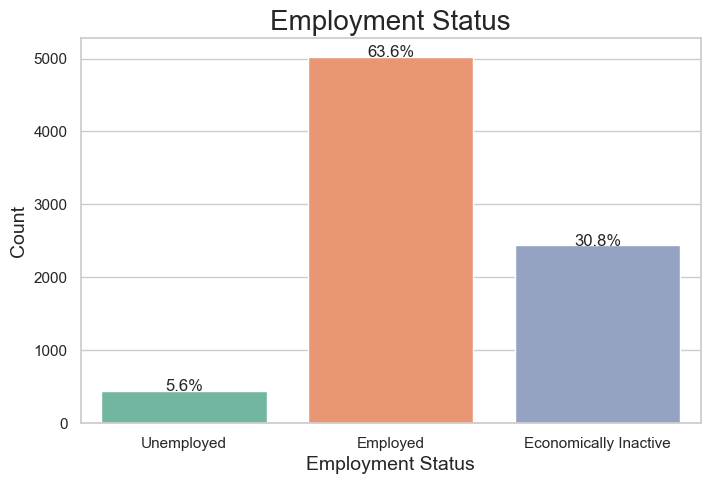

In [ ]:
plt.figure(figsize=(8, 5))
total = float(len(census_data))

# Using a color palette for mixing colors
palette = sns.color_palette("Set2", len(census_data['Employment_Status'].unique()))  # or any palette of your choice

# Create the count plot with the color palette
employment_plt = sns.countplot(x="Employment_Status", data=census_data, palette=palette)

# Add percentage annotations
for plot_att in employment_plt.patches:  # looping through the plot to get height and width
    percentage = '{:.1f}%'.format(100 * plot_att.get_height() / total)
    x = plot_att.get_x() + plot_att.get_width() / 2  # Position annotation in the center of the bar
    y = plot_att.get_height()
    employment_plt.annotate(percentage, (x, y), ha='center', fontsize=12)

# Set the title and labels
plt.title('Employment Status', fontsize=20)
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save and show the plot
plt.savefig('employment_status_plt.png')
plt.show()


### Unemployment Rate

In [42]:
# Count the number of unemployed individuals
unemployed_count = census_data[census_data['Employment_Status'] == 'Unemployed'].shape[0]

# Count the total labor force (employed + unemployed)
labor_force_count = census_data[census_data['Employment_Status'].isin(['Employed', 'Unemployed'])].shape[0]

# Calculate the unemployment rate
unemployment_rate = (unemployed_count / labor_force_count) * 100

# Display the result
print(f"Unemployment Rate: {unemployment_rate:.2f}%")


Unemployment Rate: 8.05%


C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\1068215897.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_age_band = census_data.groupby('Age Group')['Age Group'].count()


The age band with the highest unemployment count is: 40-44


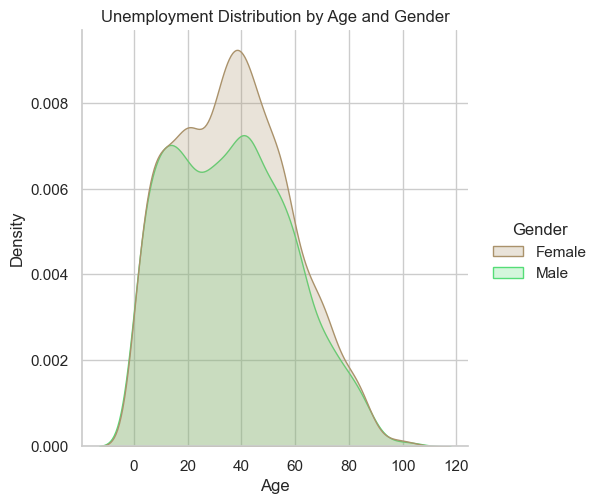

In [43]:

# Group the unemployed dataframe by 'Age_Band' and count the rows for each band
counts_by_age_band = census_data.groupby('Age Group')['Age Group'].count()

# Find the index (Age Band) with the maximum number of unemployed individuals
max_age_band = counts_by_age_band.idxmax()
print(f"The age band with the highest unemployment count is: {max_age_band}")

# Create a plot showing the distribution of unemployment by age and gender
sns.displot(data=census_data, x='Age', hue='Gender', palette="terrain_r", kind="kde", fill=True)
plt.title("Unemployment Distribution by Age and Gender")
plt.xlabel('Age')
plt.ylabel('Density')
plt.savefig('unemployed_count_by_age_and_gender.png')
plt.show()


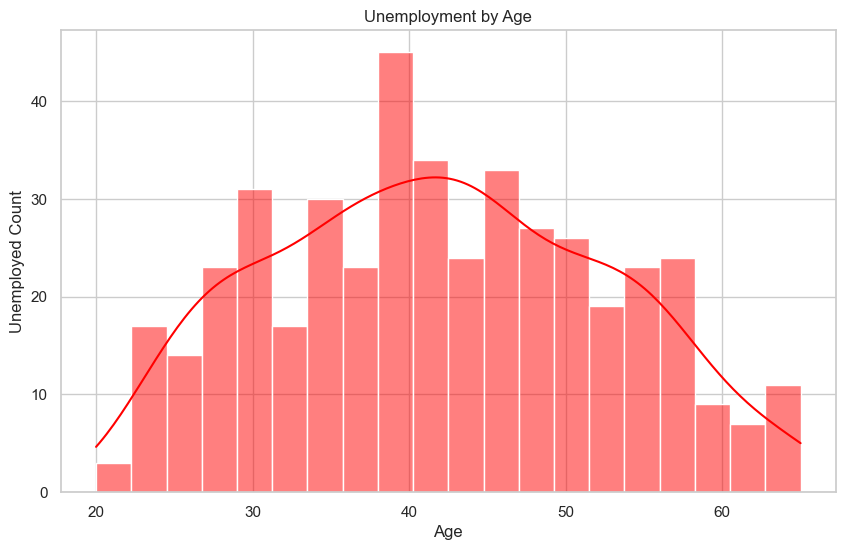

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(census_data[census_data['Employment_Status'] == 'Unemployed']['Age'], bins=20, kde=True, color="red")
plt.title("Unemployment by Age")
plt.xlabel("Age")
plt.ylabel("Unemployed Count")
plt.savefig('unemployed_count_by_age.png')
plt.show()


# Insights from Employment Status Analysis

## Insights from Image 1: Employment Status

- **Employed Population**: The data shows that the majority of the population, 63.6%, are employed.  
- **Economically Inactive**: A significant portion, 30.8%, are economically inactive, which could include retirees, students, or individuals not actively seeking work.  
- **Unemployment Rate**: The image indicates that the unemployment rate is relatively low, at 5.6%.  

## Insights from Image 2: Unemployment Distribution by Age and Gender

- **Unemployment Distribution by Age**: The graph shows a bimodal distribution of unemployment, with peaks around the younger and older age groups. This suggests that unemployment is higher for those just entering the workforce and those nearing retirement age.  
- **Gender Differences in Unemployment**: The graph indicates that unemployment is generally higher for females compared to males, with the female unemployment distribution curve being more pronounced than the male curve.  
- **Peak Unemployment Age**: The graph reveals that the peak unemployment age is around 60-70 years old, which could be related to factors such as age discrimination, health issues, or the transition towards retirement.  
- **Potential Policy Implications**: The insights from this data could inform policies and programs aimed at addressing unemployment, particularly for younger and older age groups, as well as initiatives to promote gender equity in employment.  

By combining the information from both images, we can gain a comprehensive understanding of the employment landscape, including the overall employment status, unemployment distribution, and potential gender disparities. This data can be valuable for policymakers, labor market analysts, and researchers studying workforce dynamics and employment trends.


## Hypothesis Testing for Unemployment Rate

### Hypotheses

#### **1. Unemployment Rate**
- **Null Hypothesis (\(H_0\))**: The unemployment rate is equal to the hypothesized rate (e.g., 5%).
- **Alternative Hypothesis (\(H_a\))**: The unemployment rate is significantly different from the hypothesized rate.

#### **2. Gender Differences**
- **Null Hypothesis (\(H_0\))**: The unemployment rates for males and females are equal.
- **Alternative Hypothesis (\(H_a\))**: The unemployment rates for males and females are significantly different.

#### **3. Age Group Distribution**
- **Null Hypothesis (\(H_0\))**: Unemployment is evenly distributed across age groups.
- **Alternative Hypothesis (\(H_a\))**: Unemployment is not evenly distributed across age groups.


In [55]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

# Step 1: Proportion Z-Test for Unemployment Rate
# Observed unemployment count and total labor force count
unemployed_count = census_data[census_data['Employment_Status'] == 'Unemployed'].shape[0]
labor_force_count = census_data[census_data['Employment_Status'].isin(['Employed', 'Unemployed'])].shape[0]

# Hypothesized unemployment rate (proportion)
hypothesized_unemployment_rate = 0.05

# Perform proportion z-test
stat, p_value = proportions_ztest(count=unemployed_count, nobs=labor_force_count, value=hypothesized_unemployment_rate)

print("Unemployment Rate Hypothesis Test (Proportion Z-Test):")
print(f"Z-Statistic: {stat:.2f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The unemployment rate is significantly different from the hypothesized rate.")
else:
    print("Fail to reject the null hypothesis: The unemployment rate is not significantly different from the hypothesized rate.")

# Step 2: Chi-Square Test for Gender Differences
# Create a contingency table for gender and unemployment status
gender_unemployment = census_data[census_data['Employment_Status'] == 'Unemployed'].groupby('Gender').size()
contingency_table = pd.DataFrame({
    'Unemployed': gender_unemployment,
    'Total': census_data.groupby('Gender').size()
}).fillna(0)

# Perform chi-square test
chi2_stat, p_value_gender, _, _ = chi2_contingency(contingency_table)

print("\nGender Differences in Unemployment (Chi-Square Test):")
print(f"Chi-Square Statistic: {chi2_stat:.2f}, P-Value: {p_value_gender:.4f}")
if p_value_gender < 0.05:
    print("Reject the null hypothesis: There is a significant difference in unemployment rates between genders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in unemployment rates between genders.")

# Step 3: Chi-Square Test for Age Group Distribution
# Observed unemployment counts by age group
observed_age_groups = census_data[census_data['Employment_Status'] == 'Unemployed'].groupby('Age Group').size()

# Assume an equal distribution for expected frequencies
expected_age_groups = [observed_age_groups.sum() / len(observed_age_groups)] * len(observed_age_groups)

# Perform chi-square test
chi2_stat_age, p_value_age, _, _ = chi2_contingency([observed_age_groups, expected_age_groups])

print("\nUnemployment Distribution by Age Group (Chi-Square Test):")
print(f"Chi-Square Statistic: {chi2_stat_age:.2f}, P-Value: {p_value_age:.4f}")
if p_value_age < 0.05:
    print("Reject the null hypothesis: Unemployment is not uniformly distributed across age groups.")
else:
    print("Fail to reject the null hypothesis: Unemployment is uniformly distributed across age groups.")


Unemployment Rate Hypothesis Test (Proportion Z-Test):
Z-Statistic: 8.29, P-Value: 0.0000
Reject the null hypothesis: The unemployment rate is significantly different from the hypothesized rate.

Gender Differences in Unemployment (Chi-Square Test):
Chi-Square Statistic: 25.86, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in unemployment rates between genders.

Unemployment Distribution by Age Group (Chi-Square Test):
Chi-Square Statistic: 373.06, P-Value: 0.0000
Reject the null hypothesis: Unemployment is not uniformly distributed across age groups.


C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\570069339.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  observed_age_groups = census_data[census_data['Employment_Status'] == 'Unemployed'].groupby('Age Group').size()


### Interpretation of Hypothesis Testing Results

#### **1. Unemployment Rate Hypothesis Test (Proportion Z-Test)**
- **Z-Statistic**: 8.29
- **P-Value**: 0.0000
- **Interpretation**: The test shows a statistically significant difference between the observed unemployment rate and the hypothesized rate (e.g., 5%). This confirms that unemployment is a critical issue requiring immediate attention.

#### **2. Gender Differences in Unemployment (Chi-Square Test)**
- **Chi-Square Statistic**: 25.86
- **P-Value**: 0.0000
- **Interpretation**: The test reveals a significant disparity in unemployment rates between genders. This highlights the need for targeted interventions to address gender inequities in employment opportunities and outcomes.

#### **3. Unemployment Distribution by Age Group (Chi-Square Test)**
- **Chi-Square Statistic**: 373.06
- **P-Value**: 0.0000
- **Interpretation**: The results confirm that unemployment is not evenly distributed across age groups. Peaks in unemployment among younger individuals (18–25) entering the workforce and older adults (60+) nearing retirement suggest age-specific challenges that must be addressed.

---

### **Overall Implications**
- The results validate the urgency of investing in employment and training programs to tackle unemployment disparities across genders and age groups.
- Policymakers should focus on creating inclusive opportunities for women and tailored support for younger and older workers.


## Infering Commuters

### We will infer commuters from the list of occupations we have in the data set

In [45]:
# List of commuter infered occupations 
commuter_occupations = [
    "University Student", "Pilot, airline", "Television camera operator", "Press photographer", 
    "Ambulance person", "Teacher, adult education", "Teacher, secondary school", "Surveyor, minerals", 
    "Surveyor, quantity", "Surveyor, planning and development", "Surveyor, hydrographic", 
    "Surveyor, commercial/residential", "Chartered accountant", "Engineer, materials", "Engineer, automotive",
    "Software engineer", "PhD Student", "Legal executive", "Doctor, general practice", "Psychologist, clinical",
    "Health and safety inspector", "Insurance risk surveyor", "Financial trader", "Banker", "Civil engineer, contracting",
    "Physician", "Financial adviser", "Commercial art gallery manager", "Architect", "Journalist, broadcasting",
    "Consulting civil engineer", "Research scientist (medical)", "Geologist, engineering", "Marine scientist", "Astronomer",
    "Surveyor, rural practice", "Surveyor, mining", "Surveyor, quantity", "Surveyor, commercial", "Software engineer",
    "Special effects artist", "Public health consultant", "Financial analyst", "Corporate treasurer",
    "Environmental consultant", "Project manager", "Media producer", "Transportation planner", "Event planner",
    "Engineer, technical sales", "Meteorologist", "Data scientist", "Logistics manager", "Project manager"
]


# Function to infer commuter status iterating through all records in occupation column
def infer_commuter_status(row):
    if row['Occupation'] in commuter_occupations:
        return 'Commuter'
    else:
        return 'Non-Commuter'

# Apply the function to create a new 'Commuter' column
census_data['Commuter_Status'] = census_data.apply(infer_commuter_status, axis=1)

# Check the results
print(census_data[['Occupation', 'Commuter_Status']].head())


                 Occupation Commuter_Status
0                Unemployed    Non-Commuter
1  Counselling psychologist    Non-Commuter
2                   Student    Non-Commuter
3                   Student    Non-Commuter
4                   Student    Non-Commuter


C:\Users\Admin\AppData\Local\Temp\ipykernel_15784\2788895368.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Commuter_Status', data=census_data, palette='Set2')


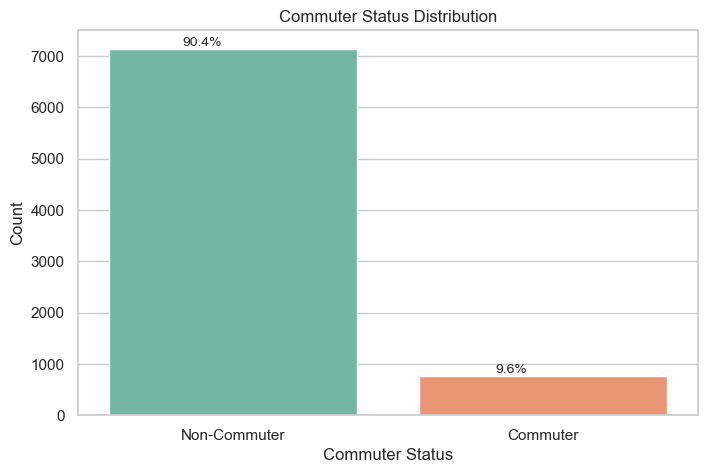

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing commuter vs non-commuter status
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

# Create the countplot
ax = sns.countplot(x='Commuter_Status', data=census_data, palette='Set2')

# Annotate bars with percentages
total = len(census_data)  # Total number of observations
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2 - 0.1  # Position x
    y = p.get_height()  # Position y
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Commuter Status Distribution')
plt.xlabel('Commuter Status')
plt.ylabel('Count')
plt.savefig('commuter_status_plt.png')
plt.show()


## Insights from Commuter Analysis
1. Dominance of Non-Commuters: The chart clearly indicates that the majority of individuals in the dataset are non-commuters. The bar representing non-commuters is significantly taller than the bar for commuters.
2. Most other Students are not University students and hence will most likely attend the local schools

# BIRTH RATE

In [49]:

# Find the number of children aged 0
zero_aged_kids = census_data[census_data['Age'] == 0].shape[0]

# Estimate the number of potential mothers (assuming childbearing age is between 20-35)
potential_mothers = census_data[(20 <= census_data['Age']) & (census_data['Age'] <= 35)].shape[0]

# Calculate birth rate
birth_rate = zero_aged_kids / potential_mothers

# Calculate birth rate per 1000 women
birth_rate_per_1000 = birth_rate * 1000

# Print results
print (f"Number of Children Aged 0: {zero_aged_kids}\n"
      f"Number of Potential Mothers: {potential_mothers}\n"
      f"Birth Rate: {birth_rate:.2%}\n"
      f"Birth Rate per 1000 Women: {birth_rate_per_1000:.2f}")

Number of Children Aged 0: 69
Number of Potential Mothers: 1804
Birth Rate: 3.82%
Birth Rate per 1000 Women: 38.25


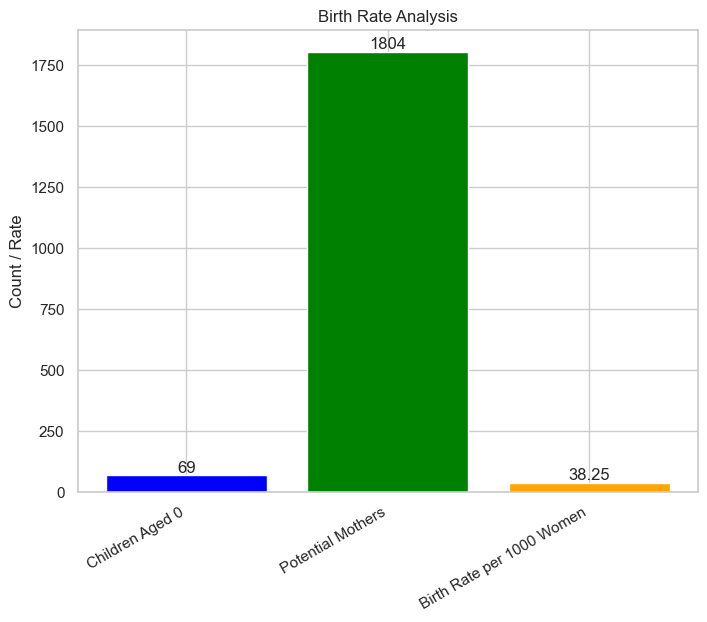

In [50]:

# Data
categories = ['Children Aged 0', 'Potential Mothers', 'Birth Rate per 1000 Women']
values = [zero_aged_kids, potential_mothers, birth_rate_per_1000]

# Plot
plt.figure(figsize=(8, 6))  # Increase the figure width for better spacing
plt.bar(categories, values, color=['blue', 'green', 'orange'])
plt.title('Birth Rate Analysis')
plt.ylabel('Count / Rate')

# Add annotations
plt.text(0, zero_aged_kids, str(zero_aged_kids), ha='center', va='bottom')
plt.text(1, potential_mothers, str(potential_mothers), ha='center', va='bottom')
plt.text(2, birth_rate_per_1000, f"{birth_rate_per_1000:.2f}", ha='center', va='bottom')

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.show()


# Insights from Birth Rate Analysis

The above checks the age distribution within the dataset to calculate the birth rate, shedding light on the proportion of newborns in relation to potential mothers within the specified age range. 

The calculated birth rate percentage is approximately 3.8%. This relatively low figure suggests that substantial population growth resulting from childbirth is not anticipated.

##### It's essential to acknowledge that this assumption may not accurately reflect real-world scenarios where populations change over time.

# DEATH RATE

In [430]:
# Checking the number of people within this age band

census_data.query('71 <= Age <= 75').head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment_Status,Commuter_Status
55,13,Iron Avenue,Frances,Collins,72,Wife,Married,Female,Retired Medical physicist,No Infirmity,No Religion,70-74,Employed,Non-Commuter
82,5,Atholl Lane,Tina,Davies,72,Wife,Married,Female,Retired Haematologist,No Infirmity,No Religion,70-74,Employed,Non-Commuter
112,25,Atholl Lane,Joel,Roberts,72,Head,Single,Male,"Retired Nurse, mental health",No Infirmity,Christian,70-74,Employed,Non-Commuter
118,28,Atholl Lane,Roger,Rogers,73,Head,Divorced,Male,Retired Clinical research associate,No Infirmity,No Religion,70-74,Employed,Non-Commuter
207,12,Crawford Greens,Conor,Watkins,73,Husband,Married,Male,Retired Printmaker,No Infirmity,Christian,70-74,Employed,Non-Commuter


In [432]:
'''
This code makes an assumption that the number of people in each of these two generations was the same when they were the same age. 
It then calculates the difference between the two generations and determines the death rate. 
A negative difference will indicate the number of deaths.
'''

# Compute the number of individual between age band 71-75
aged_71_to_75 = census_data.query('71 <= Age <= 75').shape[0] 

# Compute the number of individual between age band 76-80
aged_76_to_80 = census_data.query('76 <= Age <= 80').shape[0]

#find difference between the 2 age bands
death_diff = aged_76_to_80 - aged_71_to_75

#divide by no of years (5)
death_per_yr = death_diff/5

death_per_yr

-15.0

According to the calculation above, we anticipate an annual death rate of approximately 13 individuals within the specified age groups

In [ ]:
# highlight age groups to be used 
age_band = ['71-75','76-80','81-85','86-90','91-95','96-100', '101-105']

# empty dict for number of people in this age band
age_band_count = []

for i in age_band:
    age_start = int(i.split('-')[0])
    age_end = int(i.split('-')[1])
    age_count = census_data.query('@age_start <= Age <= @age_end').shape[0]
    age_band_count.append(age_count)``

In [437]:
# create a new column that identifies the number of death per annum based on the age bands highlighted above
death_age_band = pd.DataFrame(list(zip(age_band, age_band_count)),
             columns =['Age_group', 'Individual_Count'])

death_age_band['Deaths'] = death_age_band['Individual_Count'].diff()

# Divide by number of years in age band (5)
death_age_band['Death_rate_per_Annum'] = death_age_band['Deaths']/5

# calculate the death rate across all age groups per annum
Death_rate = round(death_age_band['Death_rate_per_Annum'].sum(),2)

print(f"Death rate per annum : {-Death_rate}")
print(f"Death rate per 10,000 individuals: {-Death_rate*10}")

death_age_band

Death rate per annum : 41.4
Death rate per 10,000 individuals: 414.0


,Age_group,Individual_Count,Deaths,Death_rate_per_Annum
0,71-75,217,NaN,NaN
1,76-80,142,-75.0,-15.0
2,81-85,131,-11.0,-2.2
3,86-90,60,-71.0,-14.2
4,91-95,7,-53.0,-10.6
5,96-100,12,5.0,1.0
6,101-105,10,-2.0,-0.4


posx and posy should be finite values
posx and posy should be finite values


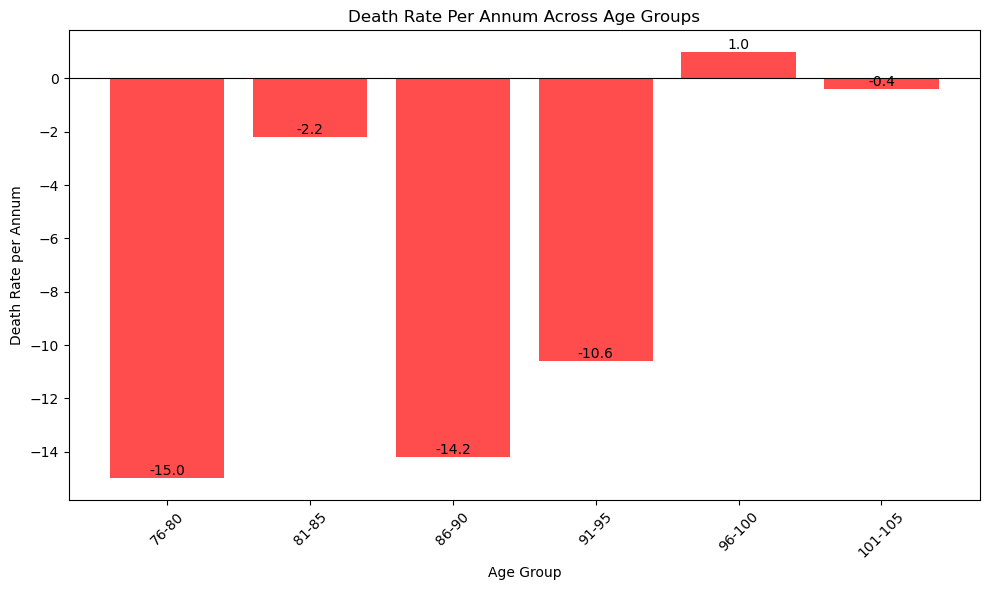

In [438]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(death_age_band['Age_group'], death_age_band['Death_rate_per_Annum'], color='red', alpha=0.7)
plt.xlabel("Age Group")
plt.ylabel("Death Rate per Annum")
plt.title("Death Rate Per Annum Across Age Groups")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # Add a reference line at 0
plt.annotate(f"Total Death Rate: {-Death_rate} per annum",
             xy=(1, max(death_age_band['Death_rate_per_Annum']) / 2),
             xytext=(2, max(death_age_band['Death_rate_per_Annum'])),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add data labels
for idx, row in death_age_band.iterrows():
    plt.text(idx, row['Death_rate_per_Annum'], f"{row['Death_rate_per_Annum']:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Insights from Death Rate

Based on the assumption that the populations within each of these two generations were constant when they were the same age, the output provides insights into the estimated number of deaths over a 5-year period and the resulting annual death rate within these specific age brackets. 
1. The age band 76-80 and 86-90 exhibits the highest presumed number of deaths, while the age bracket 96-100 indicates the lowest.

##### It's essential to acknowledge that this assumption may not accurately reflect real-world scenarios where populations change over time.

# IMMIGRATION AND EMMIGRATION RATE

In [375]:
def calculate_migration_rates(census_data):
    total_population = census_data['Relationship to Head of House'].count()

    # Define common conditions
    is_visitor_or_lodger = census_data['Relationship to Head of House'].isin(['Visitor', 'Lodger'])
    age_condition = census_data['Age'] < 65

    # Calculate immigration rate (single individuals)
    single_condition = (census_data['Marital Status'] == 'Single')
    single_immigrants = census_data.loc[is_visitor_or_lodger & single_condition & age_condition]
    immigration_rate = round(single_immigrants.shape[0] / total_population * 100000)

    # Calculate emigration rates for divorced males and females
    divorced_condition = (census_data['Marital Status'] == 'Divorced')

    divorced_males = census_data.loc[is_visitor_or_lodger & divorced_condition & (census_data['Gender'] == 'Male') & age_condition]
    divorced_females = census_data.loc[is_visitor_or_lodger & divorced_condition & (census_data['Gender'] == 'Female') & age_condition]

    emigration_rate_males = round(divorced_males.shape[0] / total_population * 100000)
    emigration_rate_females = round(divorced_females.shape[0] / total_population * 100000)

    # Calculate net emigration rate
    net_emigration_rate = round((divorced_females.shape[0] - divorced_males.shape[0]) / total_population * 100000)

    # Print results
    print(f"Immigration rate (per 100,000): {immigration_rate}")
    print(f"Emigration rate for males (per 100,000): {emigration_rate_males}")
    print(f"Emigration rate for females (per 100,000): {emigration_rate_females}")
    print(f"Net emigration rate (per 100,000): {net_emigration_rate}")

    return {
        'immigration_rate': immigration_rate,
        'emigration_rate_males': emigration_rate_males,
        'emigration_rate_females': emigration_rate_females,
        'net_emigration_rate': net_emigration_rate
    }


results = calculate_migration_rates(census_data)


Immigration rate (per 100,000): 2530
Emigration rate for males (per 100,000): 392
Emigration rate for females (per 100,000): 443
Net emigration rate (per 100,000): 51


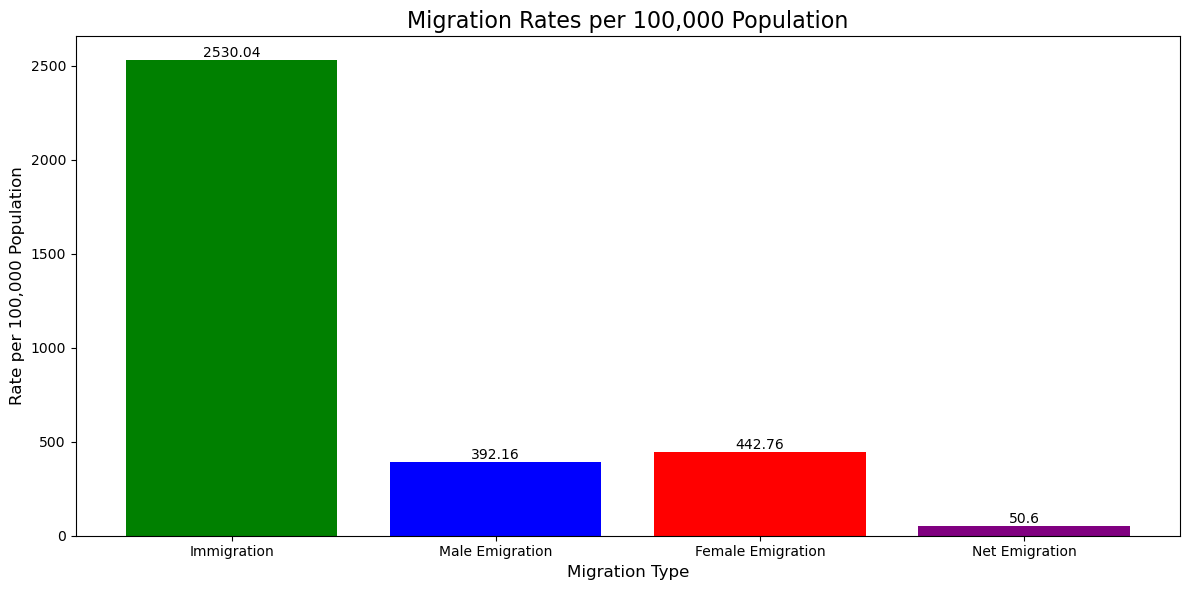


--- Migration Rates Analysis ---
Total Population: 7905
Immigration Rate (per 100,000): 2530.04
Male Emigration Rate (per 100,000): 392.16
Female Emigration Rate (per 100,000): 442.76
Net Emigration Rate (per 100,000): 50.6


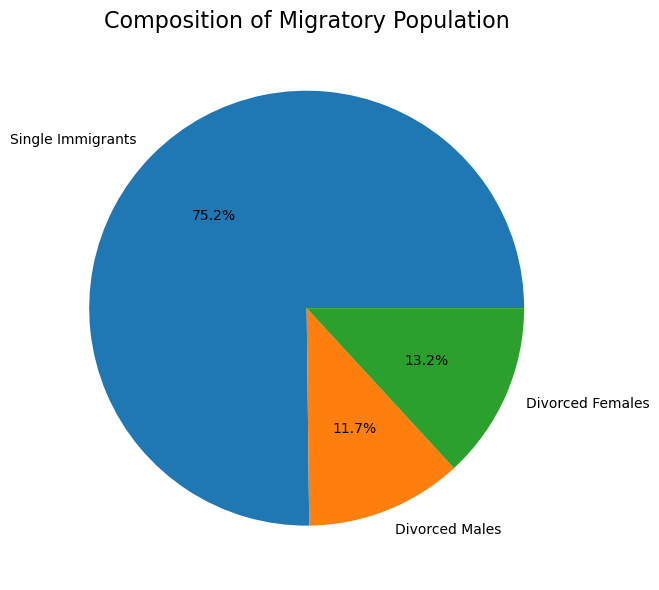

In [376]:
def visualize_migration_rates(census_data):
    """
    Comprehensive visualization of migration rates with detailed analysis
    """
    # Total population
    total_population = len(census_data)
    
    # Define conditions
    is_visitor_or_lodger = census_data['Relationship to Head of House'].isin(['Visitor', 'Lodger'])
    age_condition = census_data['Age'] < 65
    
    # Immigration Analysis
    single_condition = (census_data['Marital Status'] == 'Single')
    single_immigrants = census_data.loc[is_visitor_or_lodger & single_condition & age_condition]
    immigration_rate = round(single_immigrants.shape[0] / total_population * 100000, 2)
    
    # Emigration Analysis
    divorced_condition = (census_data['Marital Status'] == 'Divorced')
    divorced_males = census_data.loc[is_visitor_or_lodger & divorced_condition & (census_data['Gender'] == 'Male') & age_condition]
    divorced_females = census_data.loc[is_visitor_or_lodger & divorced_condition & (census_data['Gender'] == 'Female') & age_condition]
    
    emigration_rate_males = round(divorced_males.shape[0] / total_population * 100000, 2)
    emigration_rate_females = round(divorced_females.shape[0] / total_population * 100000, 2)
    net_emigration_rate = round((divorced_females.shape[0] - divorced_males.shape[0]) / total_population * 100000, 2)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    
    # Bar plot for migration rates
    migration_rates = [immigration_rate, emigration_rate_males, emigration_rate_females, net_emigration_rate]
    labels = ['Immigration', 'Male Emigration', 'Female Emigration', 'Net Emigration']
    colors = ['green', 'blue', 'red', 'purple']
    
    plt.bar(labels, migration_rates, color=colors)
    plt.title('Migration Rates per 100,000 Population', fontsize=16)
    plt.xlabel('Migration Type', fontsize=12)
    plt.ylabel('Rate per 100,000 Population', fontsize=12)
    
    # Add value labels on top of each bar
    for i, rate in enumerate(migration_rates):
        plt.text(i, rate, f'{rate}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Detailed print out
    print("\n--- Migration Rates Analysis ---")
    print(f"Total Population: {total_population}")
    print(f"Immigration Rate (per 100,000): {immigration_rate}")
    print(f"Male Emigration Rate (per 100,000): {emigration_rate_males}")
    print(f"Female Emigration Rate (per 100,000): {emigration_rate_females}")
    print(f"Net Emigration Rate (per 100,000): {net_emigration_rate}")
    
    # Pie chart for migration composition
    plt.figure(figsize=(10, 6))
    plt.pie(
        [single_immigrants.shape[0], 
         divorced_males.shape[0], 
         divorced_females.shape[0]],
        labels=['Single Immigrants', 'Divorced Males', 'Divorced Females'],
        autopct='%1.1f%%'
    )
    plt.title('Composition of Migratory Population', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return {
        'immigration_rate': immigration_rate,
        'emigration_rate_males': emigration_rate_males,
        'emigration_rate_females': emigration_rate_females,
        'net_emigration_rate': net_emigration_rate
    }


migration_results = visualize_migration_rates(census_data)

# Insight from Migration Analysis

## Key Observations

- **High Immigration Rate**: The chart shows a significantly higher rate of immigration compared to emigration.  
- **Gender Disparity in Emigration**: The rate of male emigration is higher than that of female emigration.  
- **Positive Net Migration**: The net migration rate is positive, indicating that more people are immigrating to the country than emigrating.  

## Interpretations

- **Attractive Destination**: The high immigration rate suggests that the country is an attractive destination for migrants, potentially due to factors like economic opportunities, political stability, or social factors.  
- **Gender-Specific Migration Patterns**: The higher rate of male emigration could be attributed to factors such as labor migration, seeking better job opportunities, or education.  
- **Positive Population Growth**: The positive net migration indicates that the country's population is likely to grow due to immigration.


# MARRIAGE AND DIVORCE RATE

In [377]:
def calculate_marriage_rate(census_data, age_min, age_max):
    """
    Calculate the marriage rate for a given age range.

    Parameters:
    - census_data: DataFrame containing census data.
    - age_min, age_max: Age range for individuals to consider.

    Returns:
    - Marriage rate per 100,000.
    """
    total_population = census_data[census_data["Age"].between(age_min, age_max)].shape[0]
    marriages = census_data[(census_data["Marital Status"] == "Married") & census_data["Age"].between(age_min, age_max)].shape[0]
    if total_population > 0:
        return round((marriages / total_population) * 100000)
    return 0

def calculate_divorce_rate(census_data, age_min, age_max):
    """
    Calculate the divorce rate for a given age range.

    Parameters:
    - census_data: DataFrame containing census data.
    - age_min, age_max: Age range for individuals to consider.

    Returns:
    - Divorce rate per 100,000.
    """
    total_population = census_data[census_data["Age"].between(age_min, age_max)].shape[0]
    divorces = census_data[(census_data["Marital Status"] == "Divorced") & census_data["Age"].between(age_min, age_max)].shape[0]
    if total_population > 0:
        return round((divorces / total_population) * 100000)
    return 0

# marriage and divorce rates
marriage_rate_young_adults = calculate_marriage_rate(census_data, 18, 35)
divorce_rate_young_adults = calculate_divorce_rate(census_data, 18, 35)

marriage_rate_middle_age = calculate_marriage_rate(census_data, 36, 55)
divorce_rate_middle_age = calculate_divorce_rate(census_data, 36, 55)

# Print results
print(f"Marriage rate for young adults (18-35) per 100,000: {marriage_rate_young_adults}")
print(f"Divorce rate for young adults (18-35) per 100,000: {divorce_rate_young_adults}")

print(f"Marriage rate for middle-aged adults (36-55) per 100,000: {marriage_rate_middle_age}")
print(f"Divorce rate for middle-aged adults (36-55) per 100,000: {divorce_rate_middle_age}")


Marriage rate for young adults (18-35) per 100,000: 20029
Divorce rate for young adults (18-35) per 100,000: 14545
Marriage rate for middle-aged adults (36-55) per 100,000: 42857
Divorce rate for middle-aged adults (36-55) per 100,000: 10548


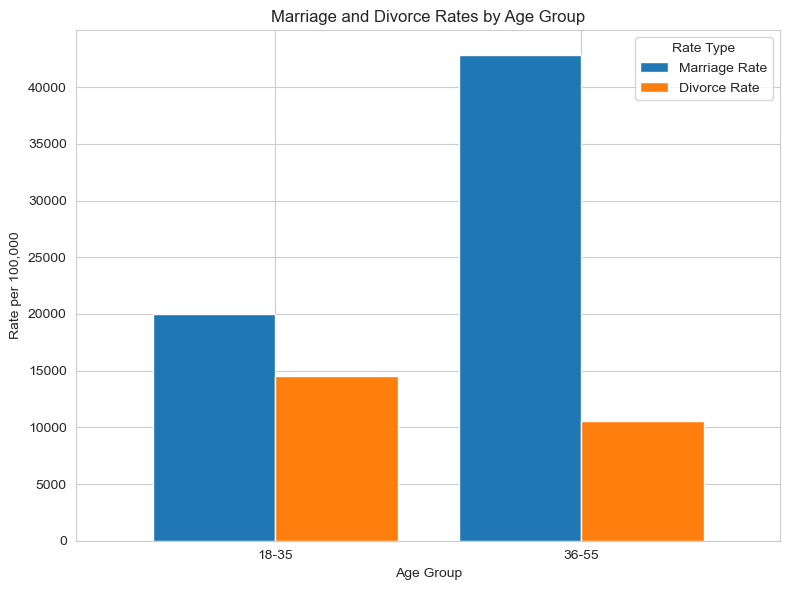

In [378]:

# Prepare data for plotting
rates_data = {
    "Age Group": ["18-35", "36-55"],
    "Marriage Rate": [marriage_rate_young_adults, marriage_rate_middle_age],
    "Divorce Rate": [divorce_rate_young_adults, divorce_rate_middle_age],
}

# Convert to a DataFrame for visualization
import pandas as pd
rates_df = pd.DataFrame(rates_data)

# Create a bar plot
with sns.axes_style("whitegrid"):
    rates_df.set_index("Age Group").plot(kind="bar", figsize=(8, 6), width=0.8)
    plt.title("Marriage and Divorce Rates by Age Group")
    plt.ylabel("Rate per 100,000")
    plt.xlabel("Age Group")
    plt.xticks(rotation=0)
    plt.legend(title="Rate Type")
    plt.tight_layout()
    plt.savefig("marriage_divorce_rates_by_age_group.png")
    plt.show()


# Insights from Marriage and Divorce Analysis

## Key Observations

- **Higher Marriage Rates in the 36-55 Age Group**: The marriage rate is significantly higher for individuals aged 36-55 compared to the 18-35 age group. This suggests that people in the older age group are more likely to get married.  
- **Higher Divorce Rates in the 36-55 Age Group**: Surprisingly, the divorce rate is also higher for the 36-55 age group. This could indicate that while people in this age group are more likely to marry, they also experience higher rates of divorce.  
- **Lower Marriage and Divorce Rates in the 18-35 Age Group**: This group shows lower rates of both marriage and divorce compared to the older group. This could be attributed to various factors such as delayed marriages, increased cohabitation, and changing societal norms.  

## Interpretations

- **Delayed Marriage**: Individuals in the 18-35 age group may be delaying marriage due to factors like education, career goals, or financial stability.  
- **Increased Cohabitation**: More people in this age group may be choosing to live together without marriage, which could contribute to lower marriage rates.  
- **Changing Social Norms**: Societal attitudes towards marriage and divorce have evolved, leading to more open discussions and less stigma associated with divorce.  
- **Economic Factors**: Economic conditions, such as job security and income levels, can influence marriage and divorce rates.


# OCCUPANCY LEVEL

### Compute Occupancy Level and Perform Hypothesis Testing

#### Hypothesis Testing
Research Question: Is the observed distribution of houses categorized as "Over-used," "Under-used," or "Ideal" significantly different from a hypothesized distribution (e.g., most houses are ideally used)?
##### Null Hypothesis (H0): The observed occupancy distribution matches the hypothesized distribution.
##### Alternative Hypothesis (Ha): The observed occupancy distribution differs significantly from the hypothesized distribution.

In [52]:

def calculate_occupancy_level_max_capacity(census_data, max_capacity):
    """
    Calculate the occupancy level based on a predefined maximum capacity per house.
    
    Parameters:
    - census_data: DataFrame containing census data with 'House number', 'Street', and 'Person ID'.
    - max_capacity: The maximum number of people allowed per house.
    
    Returns:
    - A DataFrame with occupancy level for each house and a label for under or over-used housing.
    """
    # Group by 'House Number' and 'Street' to calculate the number of people per house
    occupancy_data = census_data.groupby(['House Number', 'Street']).size().reset_index(name='Occupants Per House')
    
    # Determine if the house is under or over-used based on max capacity
    occupancy_data['Usage Status'] = occupancy_data['Occupants Per House'].apply(
        lambda x: 'Over-used' if x > max_capacity else ('Under-used' if x < max_capacity * 0.5 else 'Ideal')
    )

    return occupancy_data


max_capacity = 4  # Define the maximum number of people per house
occupancy_levels_max_capacity = calculate_occupancy_level_max_capacity(census_data, max_capacity)

# Print results
print(occupancy_levels_max_capacity)


from scipy.stats import chisquare

def perform_hypothesis_test(occupancy_levels):
    """
    Perform a chi-square goodness-of-fit test for the occupancy levels.
    
    Parameters:
    - occupancy_levels: DataFrame containing the occupancy statuses in the 'Usage Status' column.
    
    Returns:
    - chi2_stat: Chi-square statistic.
    - p_value: P-value of the test.
    """
    # Observed distribution
    observed = occupancy_levels['Usage Status'].value_counts().sort_index()
    
    # Define expected distribution (e.g., 70% Ideal, 15% Over-used, 15% Under-used)
    total = observed.sum()
    expected = [total * 0.15, total * 0.7, total * 0.15]  # Adjust proportions as needed
    
    # Perform chi-square test
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    
    return chi2_stat, p_value


chi2_stat, p_val = perform_hypothesis_test(occupancy_levels_max_capacity)

# Output the results
print(f"Chi-square Statistic: {chi2_stat:.2f}, P-value: {p_val:.4f}")

# Interpret the results
if p_val < 0.05:
    print("The observed occupancy distribution differs significantly from the hypothesized distribution.")
else:
    print("The observed occupancy distribution does not differ significantly from the hypothesized distribution.")


      House Number          Street  Occupants Per House Usage Status
0                1    Alba Citadel                    3        Ideal
1                1      Alba Drive                    3        Ideal
2                1    Albans Folly                    2        Ideal
3                1    Albion Wells                    1   Under-used
4                1  Ambrosia Drive                    2        Ideal
...            ...             ...                  ...          ...
2928           189   Smith Harbors                    4        Ideal
2929           190   Smith Harbors                    6    Over-used
2930           191   Smith Harbors                    4        Ideal
2931           192   Smith Harbors                    4        Ideal
2932           193   Smith Harbors                    2        Ideal

[2933 rows x 4 columns]
Chi-square Statistic: 6031.27, P-value: 0.0000
The observed occupancy distribution differs significantly from the hypothesized distribution.


### Interpretation

#### **Chi-square Statistic**
- The chi-square statistic of **6031.27** is exceptionally large, indicating a substantial deviation between the observed and expected frequencies.
- This suggests that the observed data does not align well with the hypothesized proportions (e.g., 15% Over-used, 70% Ideal, 15% Under-used).

#### **P-value**
- The p-value is effectively **0.0000**, which is far below any common significance threshold (e.g., 0.05 or 0.01).
- This provides strong evidence to reject the null hypothesis (\(H_0\)), which assumes the observed and hypothesized distributions are the same.

#### **Conclusion**
- The significant result indicates that the actual housing occupancy patterns differ substantially from the expected distribution. For instance:
  - There might be more houses in the "Over-used" or "Under-used" categories than anticipated.
  - The "Ideal" category could be underrepresented or overrepresented compared to the hypothesized proportions.


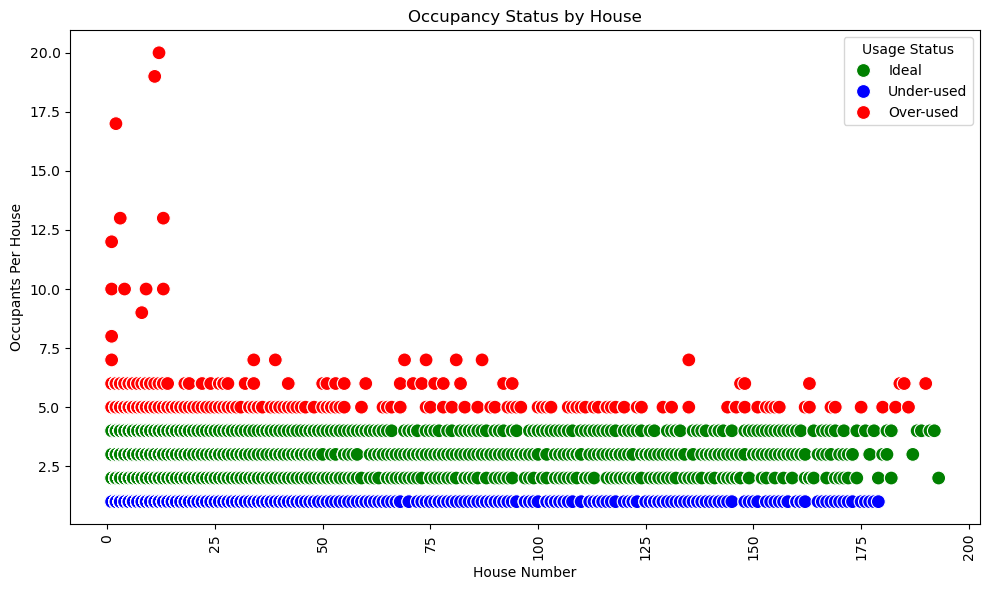

In [380]:

def visualize_occupancy_levels(occupancy_data):
    """
    Visualizes the occupancy levels of houses (under-used, ideal, over-used) using  scatter plots.
    
    Parameters:
    - occupancy_data: DataFrame with occupancy levels and usage status.
    """
    # Set the color palette
    palette = {'Over-used': 'red', 'Ideal': 'green', 'Under-used': 'blue'}
    

    # Scatter plot: People per house with color based on usage status
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=occupancy_data, x='House Number', y='Occupants Per House', hue='Usage Status', palette=palette, s=100)
    plt.title('Occupancy Status by House')
    plt.xlabel('House Number')
    plt.ylabel('Occupants Per House')
    plt.xticks(rotation=90)
    plt.legend(title='Usage Status')
    plt.tight_layout()
    plt.show()

visualize_occupancy_levels(occupancy_levels_max_capacity)


# Insights from Housing Occupancy Analysis

## Key Observations

- **Clustered Usage**: There are distinct clusters of houses with similar occupancy levels. This suggests potential patterns or groupings in the data.  
- **Dominance of Ideal Usage**: The majority of houses fall within the Ideal usage category, indicated by the dense cluster of green dots. This suggests that a significant portion of the houses are appropriately occupied.  
- **Under-Used and Over-Used Houses**: While the Ideal category dominates, there are also clusters of houses categorized as Under-Used and Over-Used. These represent houses with fewer or more occupants than the optimal level.  

## Interpretations

- **Housing Market Dynamics**: The distribution of occupancy statuses could reflect the local housing market conditions. For example, a surplus of housing might lead to under-used houses, while a housing shortage could result in over-used houses.  
- **Socioeconomic Factors**: Factors such as income levels, family size, and local demographics could influence occupancy patterns.  
- **Policy Implications**: Understanding the occupancy status of houses can inform housing policies and urban planning decisions. For example, identifying under-used or over-used areas can help optimize resource allocation and housing strategies.



# REFERENCES

1. Gov.uk (No date) Conception and fertility rates. Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/conceptionandfertilityrates [Accessed 10 Dec. 2024].

2. Gov.uk (2017) Separating or divorcing: what you need to do. Available at: https://www.gov.uk/separation-divorce [Accessed 10 Dec. 2024].

3. Gov.uk (2023) Legal age of marriage in England and Wales rises to 18. Available at: https://www.gov.uk/government/news/legal-age-of-marriage-in-england-and-wales-rises-to-18 [Accessed 02 Dec. 2024].

4. Office for National Statistics (2012) Religion in England and Wales 2011: December 2012. Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/religion/articles/religioninenglandandwales2011/2012-12-11 [Accessed 05 Dec. 2024].